# __Question 1 : PCA, choosing the dimension of data__

__1.Load dataset and explore the data__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

data = pd.read_csv('sampletestdata1.csv',header='infer')

data


,Feature 1,Feature 2,Feature 3,Class Label
0,5.235833,14.466327,2,1
1,4.721348,17.717240,2,1
2,4.948561,12.045614,2,1
3,4.758838,12.979223,2,1
4,3.008080,13.499321,2,1
...,...,...,...,...
995,0.595522,18.366753,2,0
996,1.151215,17.635233,2,0
997,13.805566,4.702994,2,0
998,7.822337,5.394940,2,0


__2.Split data into features (X) and Class Label (Y) using numpy__

In [2]:
X=data[['Feature 1', 'Feature 2', 'Feature 3']].to_numpy()
Y=data[['Class Label']].to_numpy()
Y=Y.reshape(-1)

__3. Data Visualization of input features and label in 2 Dimension__

Text(0.5, 1.0, 'Plot of data:Feature 1 verus Feature 2')

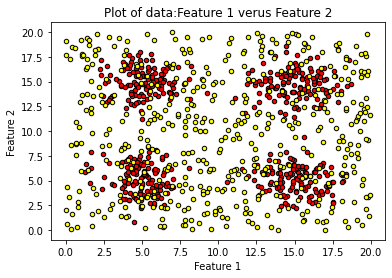

In [3]:
reds = Y == 1
black = Y == 0
plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[black, 0], X[black, 1], c="yellow", s=20, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot of data:Feature 1 verus Feature 2")

Plot show 4 clusters of class label 1 and backdrop of class label 0

__4.PCA EigenDecomposition__

In [4]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(X)

PCA()

__5. Determine how many eigenvectors to use__

[0.50459652 0.49540348 0.        ]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

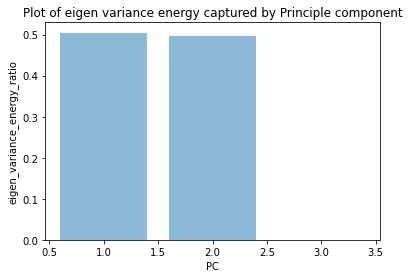

In [5]:
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy)
plt.bar(range(1,4), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

Since first two eigenvectors occupied 100% of the energy, 2 PCs are needed only. 3rd PC energy is 0

__6. Dimension Reduction using k no of PCs__

__i)2 PCs are used : Size of the dimension drops 1000x2__

In [6]:
pca_2 = PCA(n_components=2)
pca_2.fit(X)
X_pca_2=pca_2.transform(X)
print(X_pca_2)
print(X_pca_2.shape) #only 2 PC used

[[ 1.78904851  6.45867206]
 [ 0.52910756  9.49934242]
 [ 3.29881624  4.5447809 ]
 ...
 [-0.41646261 -6.34362137]
 [ 4.32352073 -2.6273899 ]
 [-5.34921689 -8.02877338]]
(1000, 2)


Text(0.5, 1.0, 'Projection of Data in Eigenspace')

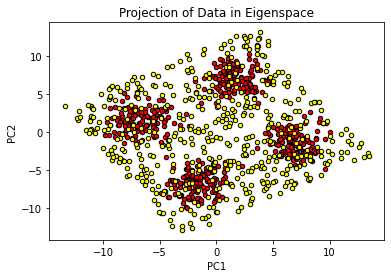

In [7]:
plt.scatter(X_pca_2[reds, 0], X_pca_2[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_2[black, 0], X_pca_2[black, 1], c="yellow",s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

In [8]:
X_pca_2_back=pca_2.inverse_transform(X_pca_2)
print(X_pca_2_back) #transform back to data space

[[ 5.23583272 14.46632731  2.        ]
 [ 4.72134789 17.71723992  2.        ]
 [ 4.94856083 12.04561402  2.        ]
 ...
 [13.80556568  4.7029942   2.        ]
 [ 7.82233666  5.39493995  2.        ]
 [18.89191428  5.84354672  2.        ]]


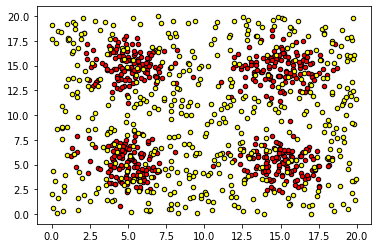

In [9]:
plt.scatter(X_pca_2_back[reds, 0], X_pca_2_back[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_2_back[black, 0], X_pca_2_back[black, 1], c="yellow",s=20, edgecolor='k')
# plot in this case is same as original data as 3rd PC has no energy

__ii) All PC are used : Size of the dimension is still 1000x3(This part is Optional ,for understanding only)__

In [10]:
X_pca_all=pca_all.transform(X)
print(X_pca_all)
print(X_pca_all.shape)

[[ 1.78904851  6.45867206  0.        ]
 [ 0.52910756  9.49934242  0.        ]
 [ 3.29881624  4.5447809   0.        ]
 ...
 [-0.41646261 -6.34362137  0.        ]
 [ 4.32352073 -2.6273899   0.        ]
 [-5.34921689 -8.02877338  0.        ]]
(1000, 3)


Text(0.5, 1.0, 'Projection of Data in Eigenspace')

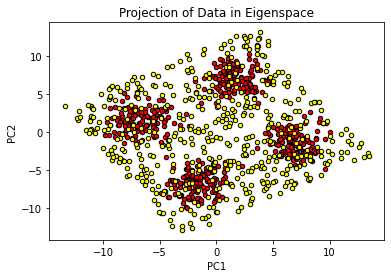

In [11]:
plt.scatter(X_pca_all[reds, 0], X_pca_all[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_all[black, 0], X_pca_all[black, 1], c="yellow",s=20, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

In [12]:
X_pca_all_back=pca_all.inverse_transform(X_pca_all)
print(X_pca_all_back)

[[ 5.23583272 14.46632731  2.        ]
 [ 4.72134789 17.71723992  2.        ]
 [ 4.94856083 12.04561402  2.        ]
 ...
 [13.80556568  4.7029942   2.        ]
 [ 7.82233666  5.39493995  2.        ]
 [18.89191428  5.84354672  2.        ]]


Text(0.5, 1.0, 'Project all PC back to data')

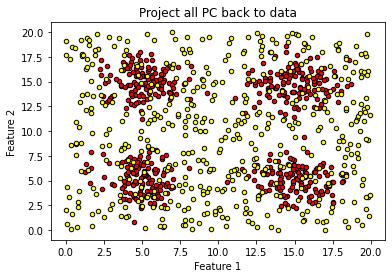

In [13]:
plt.scatter(X_pca_all_back[reds, 0], X_pca_all_back[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_all_back[black, 0], X_pca_all_back[black, 1], c="yellow",s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Project all PC back to data') # plot must be same as original data as no PC removed

# __Question 2 : Classifier on given labels__

__1. Create training and testing dataset from the Principle Component Data data based on 70,30 split__

In [14]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_2, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

__2. Test the performance of KNN and determine the best value of K to choose. Use Euclidean distance__

Text(0, 0.5, 'Accuracy')

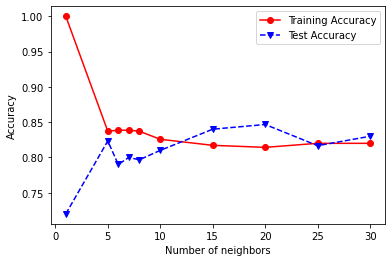

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 6,7,8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, Y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

K=5 is the knee point for both Training and Testing data. Therefore let k=5 

__3.Test the performance of Decison Tree Classifier and determine the optimal max_depth__

Text(0, 0.5, 'Accuracy')

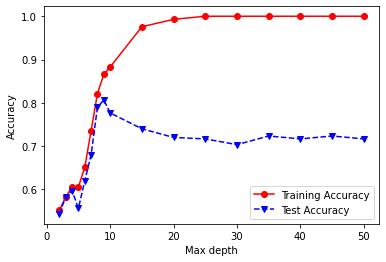

In [16]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################
from sklearn.tree import DecisionTreeClassifier
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, Y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Maxdepth=10 is the knee point for Testing data. Therefore let Max_depth=10

__4. Decision Boundary Visualization of KNN and Decision Tree__

(275, 258)
(275, 258)


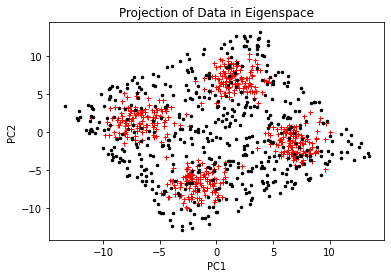

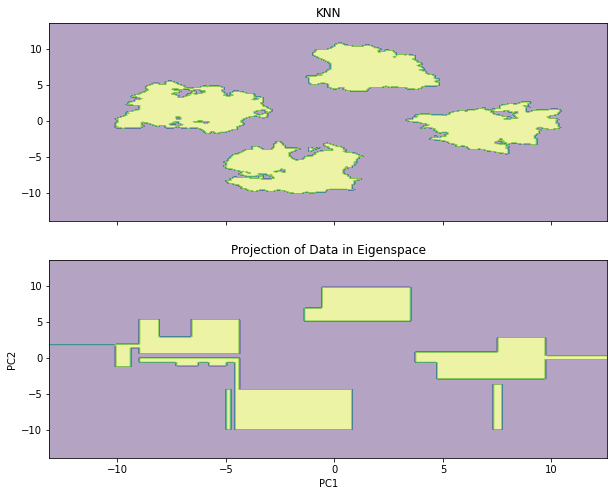

In [17]:
N=1000 # no. of row in the given data is 1000
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

plt.plot(X_pca_2[:int(N/2),0],X_pca_2[:int(N/2),1],'r+',X_pca_2[int(N/2):,0],X_pca_2[int(N/2):,1],'k.',ms=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

f, axarr = plt.subplots(2, sharex='col', sharey='row', figsize=(10, 8))

print(xx.shape)
print(yy.shape)
clf1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf1.fit(X_train, Y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=10)
clf2.fit(X_train, Y_train)
for idx, clf, tt in zip([[0], [1]], [clf1, clf2],['KNN', 'Decision Tree']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, yy, Z,alpha=0.4)
    axarr[idx[0]].set_title(tt)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Projection of Data in Eigenspace')
plt.show()



In terms of accuracy and decision boundary performance, KNN is slighly better

# __Question 3: A mystery__